**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [228]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [193]:
iris = sns.load_dataset('iris')
df_iris = pd.DataFrame(iris)
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [174]:
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

1. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [22]:
# отфильтруем и setosa
df_iris.loc[df_iris['species'] == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [35]:
# размах для setosa
print('размах для setosa')
df_iris.loc[df_iris['species'] == 'setosa'].describe().loc['max']-df_iris.loc[df_iris['species'] == 'setosa'].describe().loc['min']

sepal_length    1.5
sepal_width     2.1
petal_length    0.9
petal_width     0.5
dtype: float64

In [39]:
# стадартное отклонение есть корень из дисперсии для нахождения дисперсии возведем в кв стд откл
df_iris.loc[df_iris['species'] == 'setosa'].describe().loc['std']**2

sepal_length    0.124249
sepal_width     0.143690
petal_length    0.030159
petal_width     0.011106
Name: std, dtype: float64

In [40]:
df_iris.loc[df_iris['species'] == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [44]:
# размах для versicolor
df_iris.loc[df_iris['species'] == 'versicolor'].describe().loc['max']-df_iris.loc[df_iris['species'] == 'versicolor'].describe().loc['min']

sepal_length    2.1
sepal_width     1.4
petal_length    2.1
petal_width     0.8
dtype: float64

In [43]:
# стадартное отклонение есть корень из дисперсии для нахождения дисперсии возведем в кв стд откл
df_iris.loc[df_iris['species'] == 'versicolor'].describe().loc['std']**2

sepal_length    0.266433
sepal_width     0.098469
petal_length    0.220816
petal_width     0.039106
Name: std, dtype: float64

In [45]:
df_iris.loc[df_iris['species'] == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [46]:
# размах для versicolor
df_iris.loc[df_iris['species'] == 'versicolor'].describe().loc['max']-df_iris.loc[df_iris['species'] == 'versicolor'].describe().loc['min']

sepal_length    2.1
sepal_width     1.4
petal_length    2.1
petal_width     0.8
dtype: float64

In [47]:
# стадартное отклонение есть корень из дисперсии для нахождения дисперсии возведем в кв стд откл
df_iris.loc[df_iris['species'] == 'virginica'].describe().loc['std']**2

sepal_length    0.404343
sepal_width     0.104004
petal_length    0.304588
petal_width     0.075433
Name: std, dtype: float64

2. Визуализировать распределения признаков посредством seaborn.

In [ ]:
import seaborn as sns

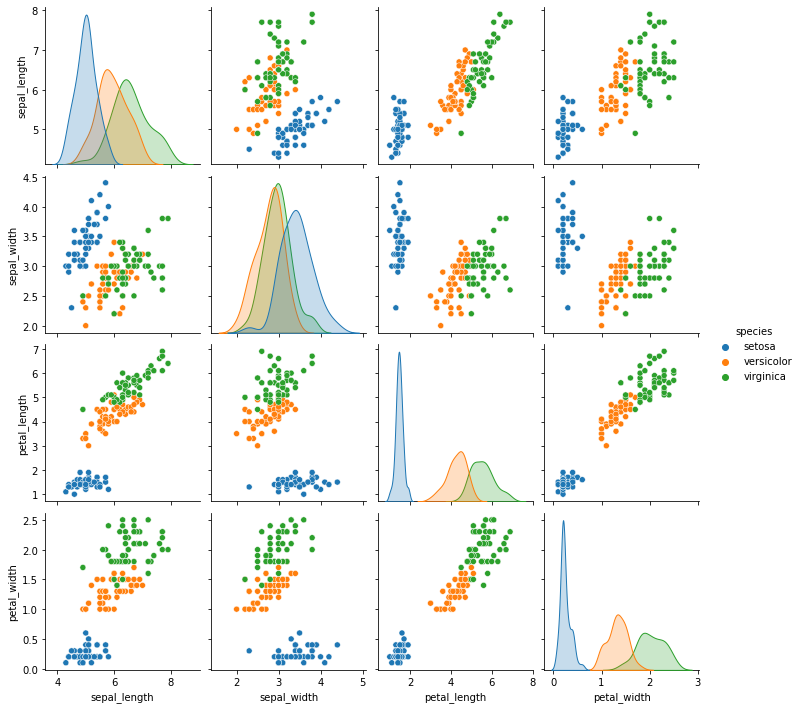

In [49]:
sns.pairplot(df_iris, hue='species'); #Диаграмма рассеяния

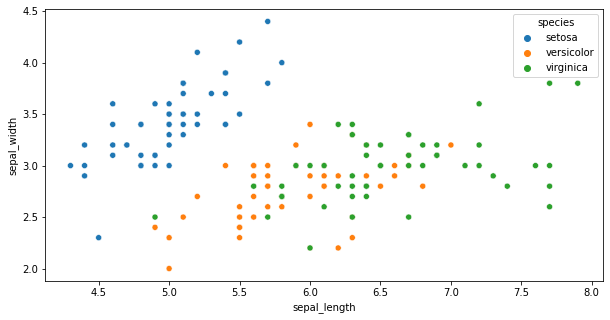

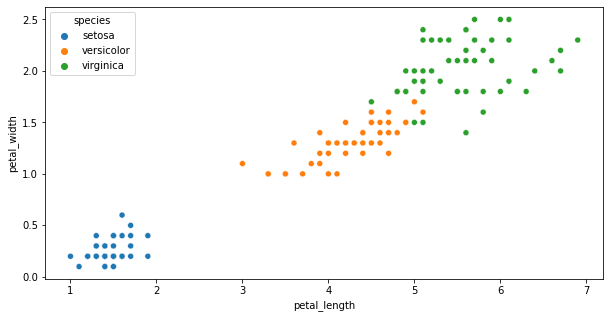

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species');
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='species');

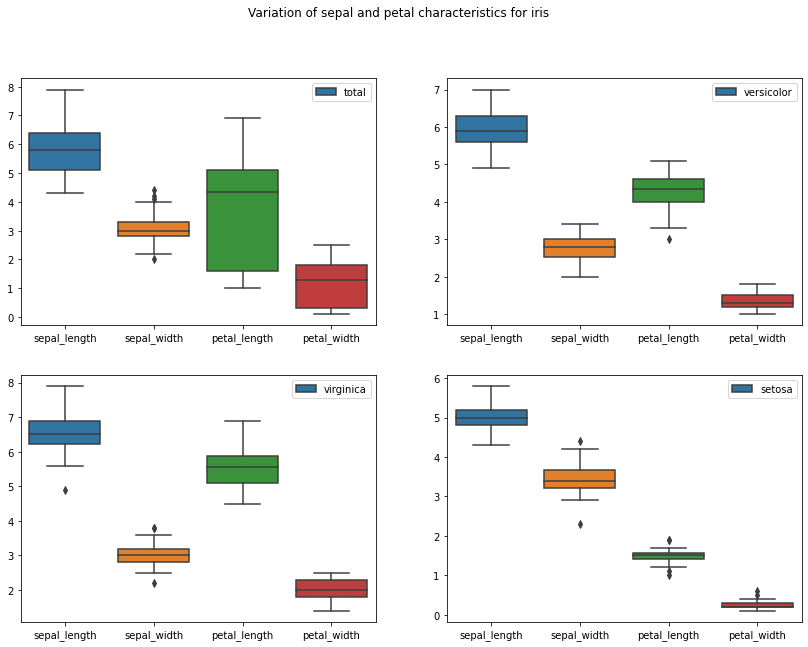

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Variation of sepal and petal characteristics for iris')
sns.boxplot(ax=axs[0, 0], data=df_iris);
axs[0, 0].legend(['total'], fontsize=10)
sns.boxplot(ax=axs[0, 1],  data=df_iris.loc[df_iris['species'] == 'versicolor']); 
axs[0, 1].legend(['versicolor'], fontsize=10)
sns.boxplot(ax=axs[1, 0], data=df_iris.loc[df_iris['species'] == 'virginica']);
axs[1, 0].legend(['virginica'], fontsize=10)
sns.boxplot(ax=axs[1, 1],data=df_iris.loc[df_iris['species'] == 'setosa']);
axs[1, 1].legend(['setosa'], fontsize=10);

3. Посчитать и визуализировать корреляционную матрицу.

In [18]:
print('Total corr matrix')
df_iris.corr()

Total corr matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [19]:
print('Corr matrix for versicolor')
df_iris.loc[df_iris['species'] == 'versicolor'].corr()

Corr matrix for versicolor


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [20]:
print('Corr matrix for virginica ')
df_iris.loc[df_iris['species'] == 'virginica'].corr()

Corr matrix for virginica 


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [21]:
print('Corr matrix for setosa ')
df_iris.loc[df_iris['species'] == 'setosa'].corr()

Corr matrix for setosa 


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


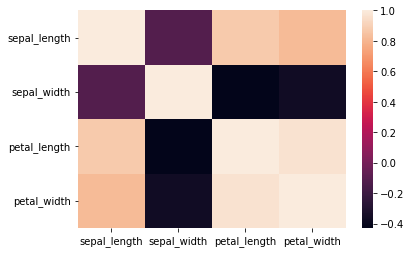

In [54]:
print('Corr matrix for total ')
sns.heatmap(df_iris.corr());

Corr matrix for versicolor 


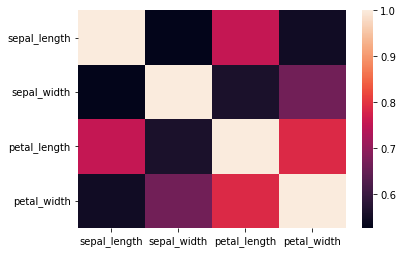

In [93]:
print('Corr matrix for versicolor ')
sns.heatmap(df_iris.loc[df_iris['species'] == 'versicolor'].corr());

Corr matrix for setosa 


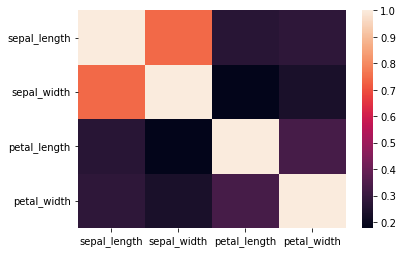

In [95]:
print('Corr matrix for setosa ')
sns.heatmap(df_iris.loc[df_iris['species'] == 'setosa'].corr());

Corr matrix for virginica 


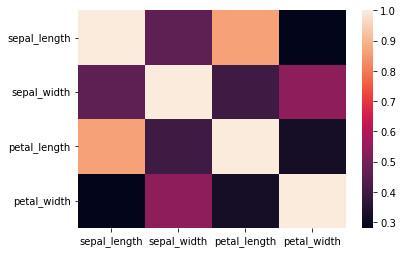

In [97]:
print('Corr matrix for virginica ')
sns.heatmap(df_iris.loc[df_iris['species'] == 'virginica'].corr());

4. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [28]:
from scipy import stats

In [49]:
list(df_iris.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [242]:
# Проведем тест шапиро и андерсана для выборок если хоть 1 тест отвергает 0 гепотицу считаем ее отвергнутой
print('Shapiro test for sepal_length')
statistic, p_value = stats.shapiro(df_iris['sepal_length'])
a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for sepal_length
It is not normal distribution (Gaussian)
Statistic: 0.9760899543762207; p_value: 0.010180278681218624


In [150]:
print('Anderson test for sepal_length')
result = stats.anderson(df_iris['sepal_length'])
print('Statistic: %.3f' % result.statistic)
sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
	print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
	print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for sepal_length
Statistic: 0.889
5.000: 0.767, data does not look normal (reject H0)


In [243]:
print('Shapiro test for sepal_width')
statistic, p_value = stats.shapiro(df_iris['sepal_width'])

a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for sepal_width
It is normal distribution (Gaussian)
Statistic: 0.9849170446395874; p_value: 0.10113201290369034


In [152]:
print('Anderson test for sepal_width')
result = stats.anderson(df_iris['sepal_width'])
print('Statistic: %.3f' % result.statistic)

sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
	print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
	print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for sepal_width
Statistic: 0.908
5.000: 0.767, data does not look normal (reject H0)


In [244]:
print('Shapiro test for petal_length')
statistic, p_value = stats.shapiro(df_iris['petal_length'])

a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for petal_length
It is not normal distribution (Gaussian)
Statistic: 0.8762689232826233; p_value: 7.41295913542217e-10


In [154]:
print('Anderson test for petal_length')
result = stats.anderson(df_iris['petal_length'])
print('Statistic: %.3f' % result.statistic)

sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
	print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
	print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for petal_length
Statistic: 7.679
5.000: 0.767, data does not look normal (reject H0)


In [245]:
print('Shapiro test for petal_width')
statistic, p_value = stats.shapiro(df_iris['petal_width'])

a = 0.05
if a < p_value:
    print('It is normal distribution (Gaussian)')
elif a > p_value:
    print('It is not normal distribution (Gaussian)')
elif a == p_value:
    print('It is edge case')
    
print(f'Statistic: {statistic}; p_value: {p_value}')

Shapiro test for petal_width
It is not normal distribution (Gaussian)
Statistic: 0.9018341898918152; p_value: 1.680291461525485e-08


In [156]:
print('Anderson test for petal_width')
result = stats.anderson(df_iris['petal_width'])
print('Statistic: %.3f' % result.statistic)

sl, cv = result.significance_level[2], result.critical_values[2]
if result.statistic < result.critical_values[2]:
	print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
else:
	print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Anderson test for petal_width
Statistic: 5.106
5.000: 0.767, data does not look normal (reject H0)


5. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [246]:
print('Групировка метрик')
df_iris.groupby('species').agg(['max', 'min', 'mean', 'var' , 'std'])

Групировка метрик


sepal_length                                 sepal_width       \
                    max  min   mean       var       std         max  min   
species                                                                    
setosa              5.8  4.3  5.006  0.124249  0.352490         4.4  2.3   
versicolor          7.0  4.9  5.936  0.266433  0.516171         3.4  2.0   
virginica           7.9  4.9  6.588  0.404343  0.635880         3.8  2.2   

                                      petal_length                        \
             mean       var       std          max  min   mean       var   
species                                                                    
setosa      3.428  0.143690  0.379064          1.9  1.0  1.462  0.030159   
versicolor  2.770  0.098469  0.313798          5.1  3.0  4.260  0.220816   
virginica   2.974  0.104004  0.322497          6.9  4.5  5.552  0.304588   

                     petal_width                                  
                 std         max  min   mean       var       std  
species                                                           
setosa      0.173664         0.6  0.1  0.246  0.011106  0.105386  
versicolor  0.469911         1.8  1.0  1.326  0.039106  0.197753  
virginica   0.551895         2.5  1.4  2.026  0.075433  0.274650

6. Написать функцию, автоматизирующую EDA.

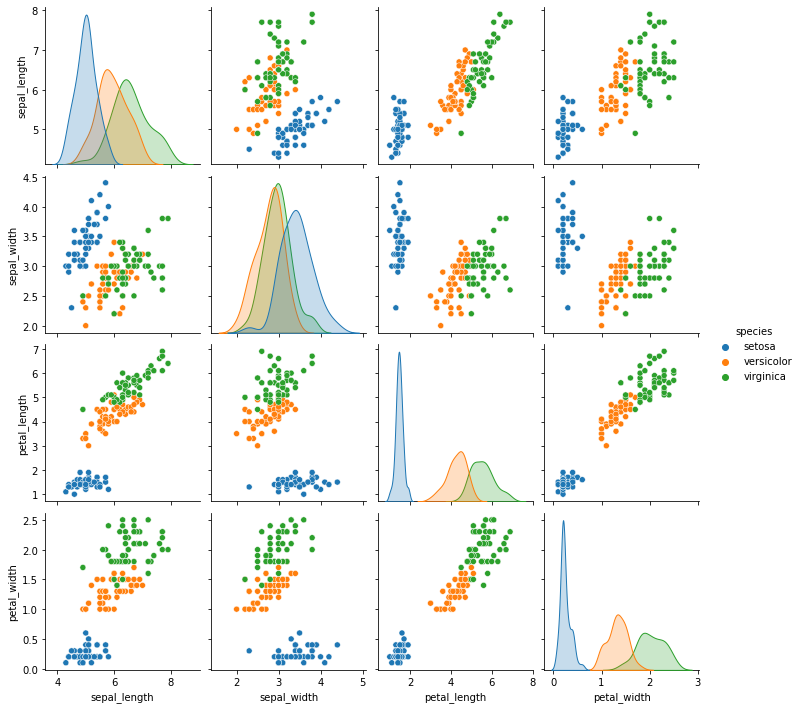

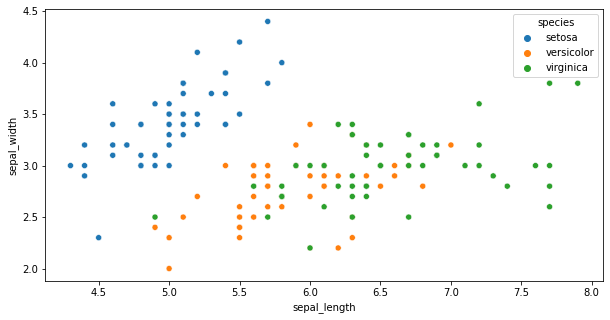

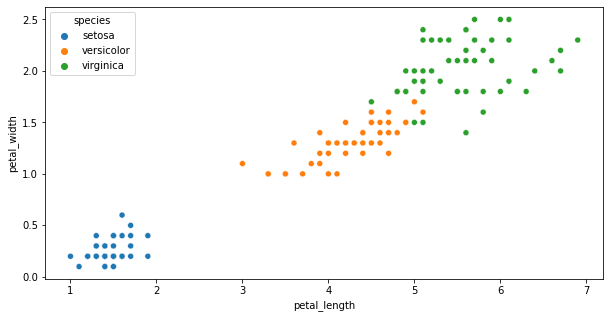

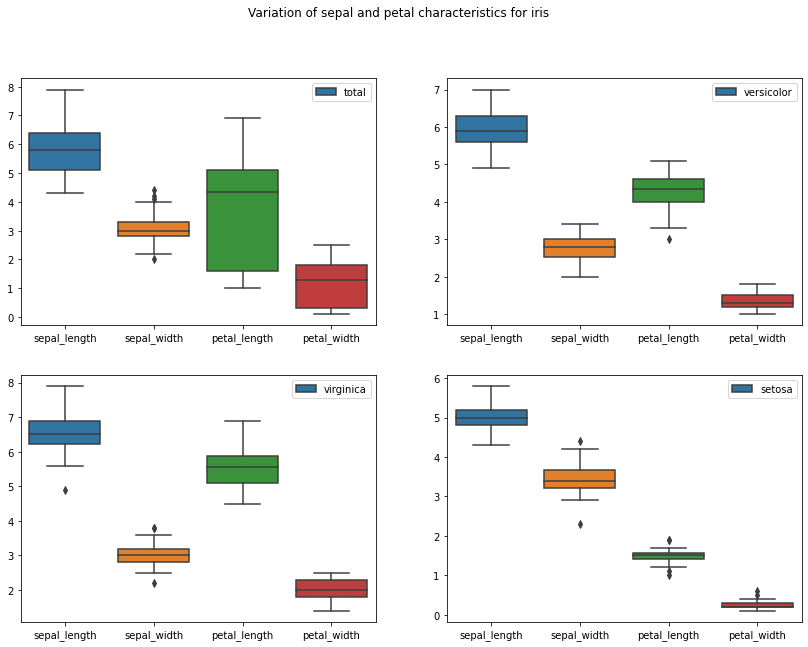

In [119]:
def eda_uploads(data):# 1 я функция для закачки данных
    iris = sns.load_dataset(data)
    df_iris = pd.DataFrame(iris)
    return df_iris
    

def eda_visualisation(function_uploads):# 2 я функция для визуализации принимает на вход 1ю функцию 
    sns.pairplot(function_uploads, hue='species'), 
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=function_uploads, x='sepal_length', y='sepal_width', hue='species');
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=function_uploads, x='petal_length', y='petal_width', hue='species');
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Variation of sepal and petal characteristics for iris')
    sns.boxplot(ax=axs[0, 0], data=function_uploads);
    axs[0, 0].legend(['total'], fontsize=10)
    sns.boxplot(ax=axs[0, 1],  data=function_uploads.loc[df_iris['species'] == 'versicolor']); 
    axs[0, 1].legend(['versicolor'], fontsize=10)
    sns.boxplot(ax=axs[1, 0], data=function_uploads.loc[df_iris['species'] == 'virginica']);
    axs[1, 0].legend(['virginica'], fontsize=10)
    sns.boxplot(ax=axs[1, 1],data=function_uploads.loc[df_iris['species'] == 'setosa']);
    axs[1, 1].legend(['setosa'], fontsize=10);
            

eda_visualisation(eda_uploads('iris'));    



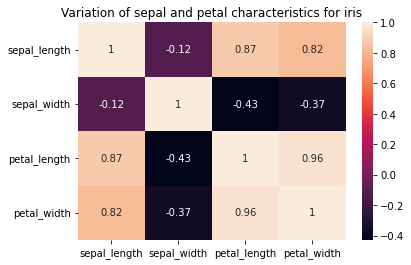

In [137]:
def eda_heat_map(function_uploads): # тоже принимает на вход 1ю функцию пока не знаю как прогрузить все тепловые карты на одном графике
    return plt.title('Variation of sepal and petal characteristics for iris'), sns.heatmap(function_uploads.corr(), annot=True);
        
eda_heat_map(eda_uploads('iris'));    

In [223]:
def eda_normality_test(function_uploads, param): # тоже принимает на вход 1ю функцию и характеристику столбца
    print(f'Anderson test for {param}')
    result = stats.anderson(function_uploads[param])
    print('Statistic: %.3f' % result.statistic)
    sl, cv = result.significance_level[2], result.critical_values[2] #2 это погрешность 5%
    if result.statistic < result.critical_values[2]:
        return '%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv)
    else:
        return '%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv)

eda_normality_test(eda_uploads('iris'), 'sepal_length')   


Anderson test for sepal_length
Statistic: 0.889


'5.000: 0.767, data does not look normal (reject H0)'

In [247]:
eda_normality_test(eda_uploads('iris'), 'sepal_width')

Anderson test for sepal_width
Statistic: 0.908


'5.000: 0.767, data does not look normal (reject H0)'

In [248]:
eda_normality_test(eda_uploads('iris'), 'petal_width')

Anderson test for petal_width
Statistic: 5.106


'5.000: 0.767, data does not look normal (reject H0)'

In [249]:
eda_normality_test(eda_uploads('iris'), 'petal_length')

Anderson test for petal_length
Statistic: 7.679


'5.000: 0.767, data does not look normal (reject H0)'

In [250]:
def statistics(function_uploads, param):
    return function_uploads.groupby(param).agg(['max', 'min', 'mean', 'var' , 'std'])
    
statistics(eda_uploads('iris'), 'species')    

sepal_length                                 sepal_width       \
                    max  min   mean       var       std         max  min   
species                                                                    
setosa              5.8  4.3  5.006  0.124249  0.352490         4.4  2.3   
versicolor          7.0  4.9  5.936  0.266433  0.516171         3.4  2.0   
virginica           7.9  4.9  6.588  0.404343  0.635880         3.8  2.2   

                                      petal_length                        \
             mean       var       std          max  min   mean       var   
species                                                                    
setosa      3.428  0.143690  0.379064          1.9  1.0  1.462  0.030159   
versicolor  2.770  0.098469  0.313798          5.1  3.0  4.260  0.220816   
virginica   2.974  0.104004  0.322497          6.9  4.5  5.552  0.304588   

                     petal_width                                  
                 std         max  min   mean       var       std  
species                                                           
setosa      0.173664         0.6  0.1  0.246  0.011106  0.105386  
versicolor  0.469911         1.8  1.0  1.326  0.039106  0.197753  
virginica   0.551895         2.5  1.4  2.026  0.075433  0.274650

7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

1) petal_length параметр который более сльно варьируется в зависимости от вида ириса
sepal_length и sepal_width в целом лежат довольно близко друг к другу что так же видно на точечный диаграме.
Основными характеристиками для класификации стоит счетать параметры petal: petal_length и petal_width.
2) Для Versicolor мы видем большую кореляцию petal_length и petal_width
Для Setosa видим большую кореляцию sepal_length и sepal_width
Для virginica видим большую кореляцию petal_length и sepal_length. 
У всех видов большую скорелированость имеют разные признаки
3) 0 гипотиза по критерию Андерсона отброшена распределение считаем не нормальным хоть распределение большей части и находится на границе


In [212]:
y = iris['species'] # Зададим у вектор
x = iris.drop('species', axis=1) # зададим x матрицу признаков

In [213]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [214]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=2, test_size=0.20)

In [240]:
lr = LogisticRegression() # LogisticRegression
lr.fit(xtrain, ytrain)
lr_p = lr.predict(xtest)
lr_report = classification_report(ytest, lr_p)
lr_a = round(accuracy_score(ytest, lr_p)*100, ndigits=4)
print(f'Acyracity of Logistic regrassion - {lr_a}\nClassification report - \n {lr_report}')

Acyracity of Logistic regrassion - 93.3333
Classification report - 
               precision    recall  f1-score   support

      setosa       1.00      0.93      0.96        14
  versicolor       0.88      0.88      0.88         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.93        30
   macro avg       0.92      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [235]:
val = cross_val_score(lr, x, y, cv=5, scoring='f1_macro')
print(f' Cross validation of Logistic regrassion - {val}')

 Cross validation of Logistic regrassion - [0.96658312 1.         0.93265993 0.89974937 1.        ]


In [236]:
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)
tree_p = tree.predict(xtest)
tree_report = classification_report(ytest, tree_p)
tree_a = round(accuracy_score(ytest, tree_p)*100, ndigits=4)
print(f'Acyracity of DecisionTreeClassifier - {tree_a}\nClassification report - \n {tree_report}')

Acyracity of DecisionTreeClassifier - 93.3333
Classification report - 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.88      0.88         8
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [237]:
val = cross_val_score(tree, x, y, cv=5, scoring='f1_macro')
print(f' Cross validation of DecisionTreeClassifier - {val}')

 Cross validation of DecisionTreeClassifier - [0.96658312 0.96658312 0.89974937 0.96658312 1.        ]


In [239]:
svm_model = svm.SVC()
svm_model.fit(xtrain, ytrain)
svm_model_p = svm_model.predict(xtest)
svm_model_report = classification_report(ytest, svm_model_p)
svm_model_a = round(accuracy_score(ytest, svm_model_p)*100, ndigits=4)
print(f'Acyracity of SVC - {svm_model_a}\nClassification report - \n {svm_model_report}')

Acyracity of SVC - 96.6667
Classification report - 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93         8
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

